# Imports

In [17]:
import pandas as pd
from bicon import *
import gseapy

# Breast cancer

## 1. Data

## 1.1 Viewing the data
### 1.1.1 Gene expression

In [3]:
expr = pd.read_csv("data/breast_cancer/expression.csv",index_col = 0)
expr.head()

,TCGA-A7-A0D9-01,TCGA-B6-A0WX-01,TCGA-LL-A50Y-01,TCGA-A2-A3XX-01,TCGA-AR-A1AU-01,TCGA-D8-A1Y2-01,TCGA-B6-A402-01,TCGA-BH-A0C7-01,TCGA-GM-A3XN-01,TCGA-A7-A6VX-01,...,TCGA-BH-A0BT-01,TCGA-E9-A5FL-01,TCGA-AR-A1AY-01,TCGA-E2-A1LG-01,TCGA-EW-A1P3-01,TCGA-E2-A15M-01,TCGA-E2-A159-01,TCGA-LL-A73Y-01,TCGA-AN-A0AT-01,TCGA-EW-A1J1-01
399473,-0.1993,-0.6873,-0.9971,0.3346,1.6830,0.4340,0.0300,-1.2142,0.5470,1.2209,...,0.2522,-1.6394,0.6880,0.3346,1.3283,-0.6873,-0.7588,1.0151,-0.4131,-1.5522
6697,5.9165,4.6508,6.7629,4.9598,5.6082,5.2917,4.8445,6.0466,5.0922,5.9265,...,4.8435,5.3827,4.6764,4.4357,6.2533,4.6029,3.8670,4.8400,5.2242,4.7296
161725,-0.0574,-2.1779,-1.7809,-1.5522,-0.3201,-1.4699,-2.4659,-0.3022,-1.0862,-0.2328,...,-2.5479,-4.6082,-0.8863,0.8961,-1.8836,-0.9406,-0.7346,0.2762,-4.0350,-2.2447
2776,3.9974,4.2480,3.2405,2.6043,4.4575,3.8075,3.2944,5.2434,3.7378,5.2392,...,4.3328,2.8955,3.4971,4.3834,3.6600,5.0900,4.1409,4.3234,3.9543,5.9512
9033,-2.9324,-2.6349,-2.9324,-1.4305,-0.9406,0.9642,-2.4659,-0.9406,-0.7588,-0.0425,...,-2.5479,-0.3383,-3.1714,-1.2828,-0.0574,-1.0862,-0.9132,-5.5735,-2.3884,-1.4305


### 1.1.2 PPI

In [4]:
ppi = pd.read_csv("data/biogrid.human.entrez.tsv", sep = "\t", header = None)
ppi.head()

,0,1
0,6416,2318
1,6416,5371
2,6416,351
3,6416,409
4,6416,5932


# 1.2 Preprocessing:
### BiCoN preprocessing module by default takes care of data normalization, log2 transformation and reduction to the most variable genes

In [18]:
path_expr,path_net ='data/breast_cancer/expression.csv', 'data/biogrid.human.entrez.tsv'
GE,G,labels, _= data_preprocessing(path_expr, path_net)


### If your data is already zscored set zscores=False.
### If you don't need log2 transformation set log2=False.


## 2. Running the algorithm

### 2.1 Setting solution minimal and maximal size

In [19]:
L_g_min = 10
L_g_max = 15

### 2.2 Running the search (takes 2-3 minutes)

In [31]:
model = BiCoN(GE,G,L_g_min,L_g_max)
solution,scores= model.run_search(max_iter = 50, verbose = False)

100%|██████████| 20/20 [00:01<00:00, 17.14it/s]


## 3. Results analysis

### 3.1 Creating the object for results analysis

In [32]:
results = results_analysis(solution, labels, convert = True, origID = 'entrezgene')
# convert = True - to convert to gene names
# origID = 'entrezgene' - the original gene id

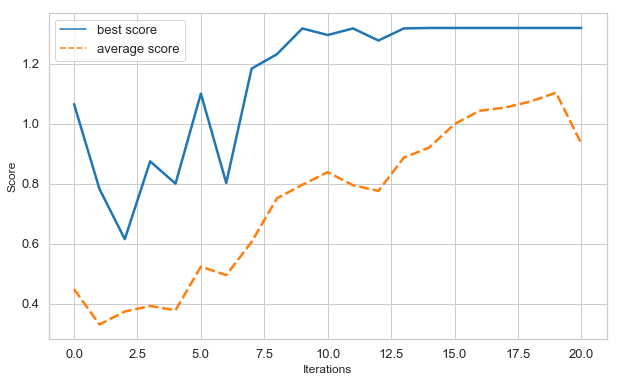

In [33]:
results.convergence_plot(scores)

### 3.2 Network visualization

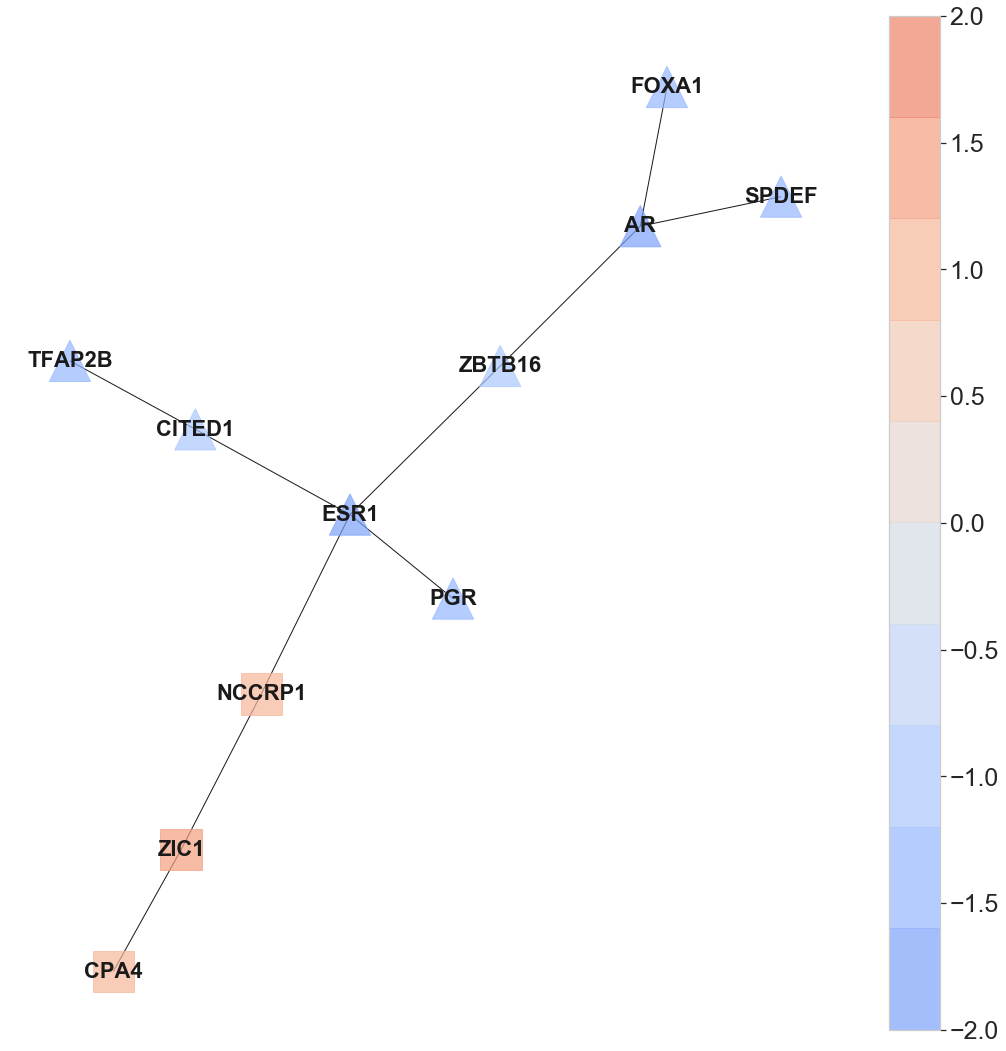

In [34]:
results.show_networks(GE, G)


### 3.2 Biclustering visualization

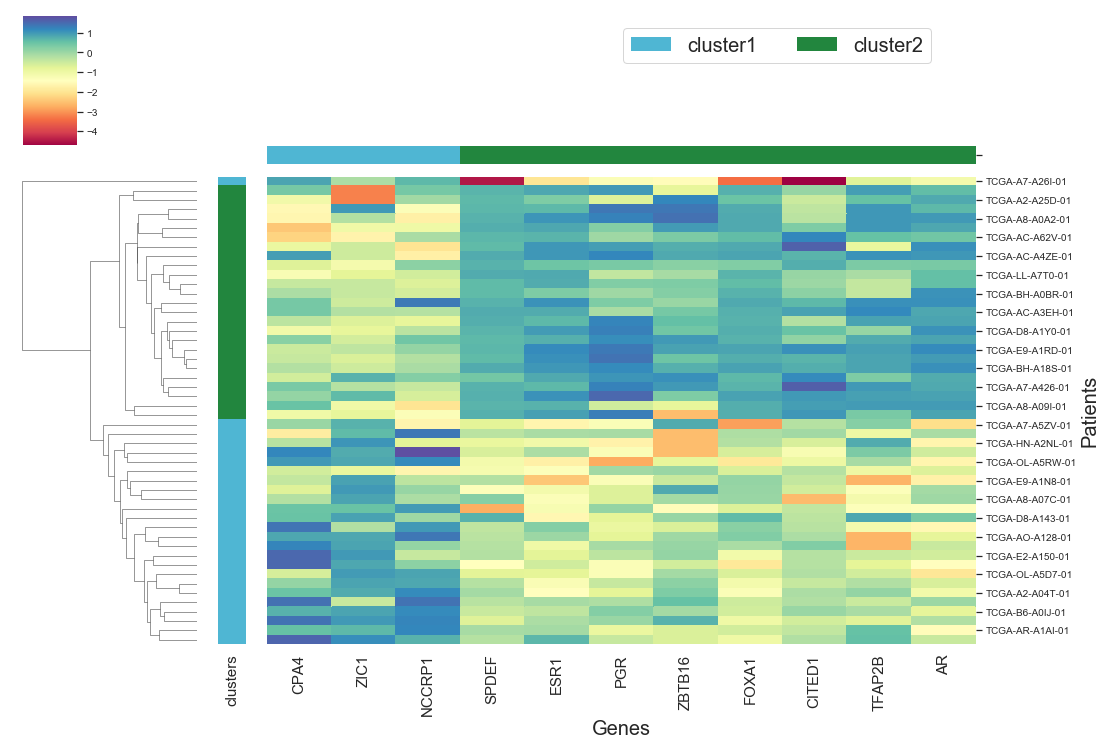

In [35]:
results.show_clustermap(GE, G)

### To access patients/genes biclusters run:
```{python}
print(results.patients1)
print(results.patients1)
print(results.genes1)
print(results.genes2)
```
#### Example: print patients IDs in the first bicluster:

In [11]:
print(results.patients1)

['TCGA-B6-A0WX-01', 'TCGA-A2-A3XX-01', 'TCGA-B6-A402-01', 'TCGA-A8-A09Z-01', 'TCGA-PL-A8LV-01', 'TCGA-A2-A3XU-01', 'TCGA-C8-A12K-01', 'TCGA-C8-A131-01', 'TCGA-AO-A0JL-01', 'TCGA-AQ-A54N-01', 'TCGA-B6-A0RU-01', 'TCGA-AC-A2QJ-01', 'TCGA-E9-A1ND-01', 'TCGA-WT-AB44-01', 'TCGA-E2-A573-01', 'TCGA-PL-A8LZ-01', 'TCGA-A2-A3XT-01', 'TCGA-E2-A574-01', 'TCGA-A2-A0D2-01', 'TCGA-D8-A143-01', 'TCGA-A8-A08R-01', 'TCGA-D8-A27F-01', 'TCGA-EW-A1P8-01', 'TCGA-AR-A5QQ-01', 'TCGA-AO-A0J6-01', 'TCGA-HN-A2NL-01', 'TCGA-AN-A0FL-01', 'TCGA-OL-A5S0-01', 'TCGA-AC-A7VC-01', 'TCGA-GM-A3XL-01', 'TCGA-EW-A1PH-01', 'TCGA-BH-A0E0-01', 'TCGA-BH-A18T-01', 'TCGA-OL-A66I-01', 'TCGA-LL-A8F5-01', 'TCGA-AO-A1KR-01', 'TCGA-E2-A14N-01', 'TCGA-A7-A6VY-01', 'TCGA-E2-A158-01', 'TCGA-AO-A129-01', 'TCGA-D8-A27H-01', 'TCGA-AO-A0J4-01', 'TCGA-E9-A5FL-01', 'TCGA-AR-A1AY-01', 'TCGA-E2-A1LG-01', 'TCGA-E2-A159-01', 'TCGA-LL-A73Y-01', 'TCGA-AN-A0AT-01']


### 3.3 Quality control with the ground truth
#### load IDs of patients that have Huntington and Controls

In [36]:
lum_ids = pd.read_csv("data/breast_cancer/luminal.txt", sep = "\t", header = None)[0].tolist()
lum_ids

['TCGA-A8-A09I-01',
 'TCGA-A2-A25D-01',
 'TCGA-AR-A24X-01',
 'TCGA-E9-A1QZ-01',
 'TCGA-D8-A1Y0-01',
 'TCGA-A7-A426-01',
 'TCGA-GM-A2DL-01',
 'TCGA-BH-A18S-01',
 'TCGA-AR-A1AK-01',
 'TCGA-A7-A3J0-01',
 'TCGA-BH-A0BR-01',
 'TCGA-AC-A62V-01',
 'TCGA-AC-A3EH-01',
 'TCGA-A7-A56D-01',
 'TCGA-D8-A1Y2-01',
 'TCGA-C8-A274-01',
 'TCGA-EW-A1P5-01',
 'TCGA-E9-A1RD-01',
 'TCGA-A8-A0A2-01',
 'TCGA-BH-A18U-01',
 'TCGA-E2-A14O-01',
 'TCGA-AC-A2QI-01',
 'TCGA-AC-A4ZE-01',
 'TCGA-LL-A7T0-01',
 'TCGA-AO-A0J7-01']

In [37]:
basal_ids = pd.read_csv("data/breast_cancer/basal.txt", sep = "\t", header = None)[0].tolist()
basal_ids

['TCGA-S3-AA0Z-01',
 'TCGA-LL-A8F5-01',
 'TCGA-AR-A251-01',
 'TCGA-E2-A1II-01',
 'TCGA-B6-A0IJ-01',
 'TCGA-A8-A07O-01',
 'TCGA-AO-A128-01',
 'TCGA-PL-A8LZ-01',
 'TCGA-A2-A3Y0-01',
 'TCGA-OL-A5D7-01',
 'TCGA-AO-A0J4-01',
 'TCGA-A8-A07C-01',
 'TCGA-EW-A3U0-01',
 'TCGA-AR-A1AI-01',
 'TCGA-BH-A5IZ-01',
 'TCGA-A2-A04T-01',
 'TCGA-A7-A13D-01',
 'TCGA-AR-A1AJ-01',
 'TCGA-E2-A150-01',
 'TCGA-OL-A5RW-01',
 'TCGA-D8-A143-01',
 'TCGA-HN-A2NL-01',
 'TCGA-A7-A26I-01',
 'TCGA-E9-A1N8-01',
 'TCGA-A7-A5ZV-01']

### 3.4 Clustermap with known labels

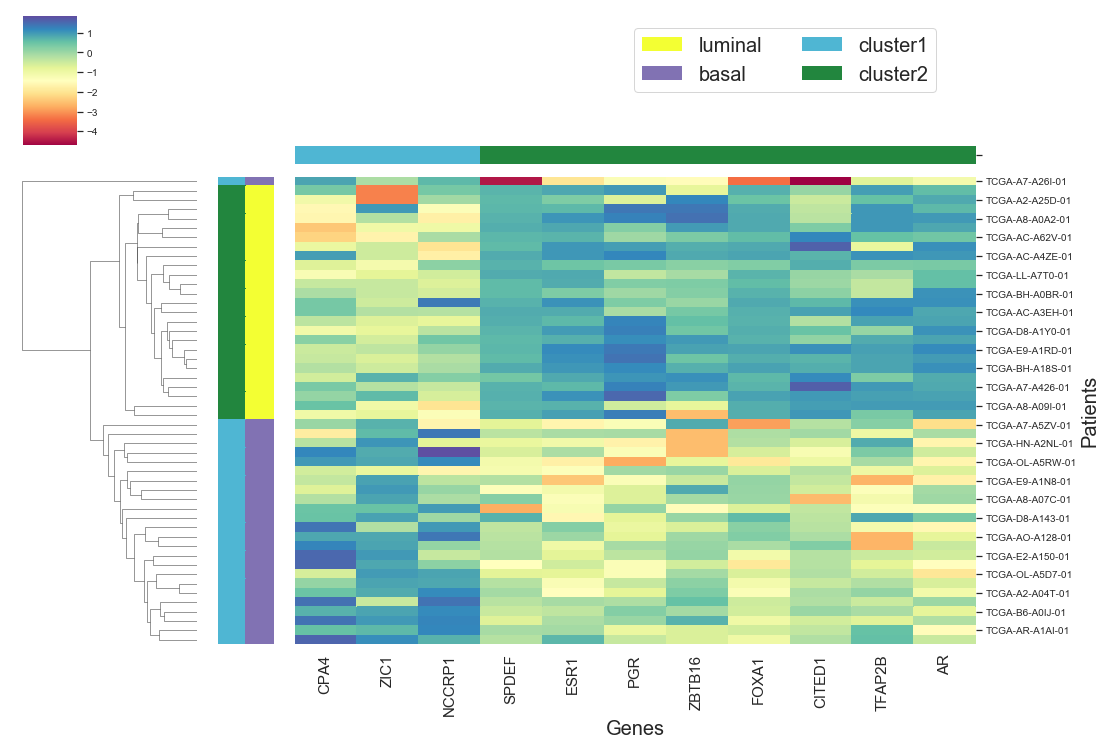

In [38]:
true_classes = [lum_ids,basal_ids]
results.show_clustermap(GE, G, true_labels = true_classes,class_names = ["luminal", "basal"])


### 3.4 Evaluate overlap between the real patient phenotype and the clusters


In [39]:
results.jaccard_index(true_labels = true_classes)


Jaccard indices for two groups are 1.0 and 1.0


(1.0, 1.0)

### 3.5 Enrichment analysis with gseapy
#### 3.5.6 Check all available libraries 

In [40]:
gseapy.get_library_name()


['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati

In [41]:
results.enrichment_analysis(library = 'GO_Biological_Process_2021', output="results")


,Adjusted P-value,Combined Score,Gene_set,Genes,Odds Ratio,Old Adjusted P-value,Old P-value,Overlap,P-value,Term
0,0.000005,755.711949,GO_Biological_Process_2021,FOXA1;TFAP2B;AR;CITED1;ZBTB16;ZIC1;PGR;ESR1,42.698440,0,0,8/1183,2.058262e-08,"positive regulation of transcription, DNA-temp..."
1,0.000006,10423.027756,GO_Biological_Process_2021,AR;PGR;ESR1,624.281250,0,0,3/15,5.610478e-08,steroid hormone mediated signaling pathway (GO...
2,0.000006,585.136872,GO_Biological_Process_2021,FOXA1;TFAP2B;AR;CITED1;ZBTB16;ZIC1;PGR;ESR1;SPDEF,36.442421,0,0,9/2206,1.063558e-07,regulation of transcription by RNA polymerase ...
3,0.000006,741.024107,GO_Biological_Process_2021,TFAP2B;AR;CITED1;ZBTB16;ZIC1;ESR1,46.298614,0,0,6/511,1.119381e-07,positive regulation of nucleic acid-templated ...
4,0.000006,568.590843,GO_Biological_Process_2021,FOXA1;TFAP2B;AR;CITED1;ZBTB16;ZIC1;PGR;ESR1;SPDEF,35.746309,0,0,9/2244,1.235918e-07,"regulation of transcription, DNA-templated (GO..."
...,...,...,...,...,...,...,...,...,...,...
237,0.193937,8.549980,GO_Biological_Process_2021,TFAP2B,5.160263,0,0,1/381,1.907316e-01,negative regulation of programmed cell death (...
238,0.215365,7.057544,GO_Biological_Process_2021,ESR1,4.559441,0,0,1/430,2.126948e-01,regulation of nucleic acid-templated transcrip...
239,0.231264,6.155464,GO_Biological_Process_2021,ESR1,4.180300,0,0,1/468,2.293529e-01,regulation of cellular macromolecule biosynthe...
240,0.263636,4.771194,GO_Biological_Process_2021,ESR1,3.567706,0,0,1/546,2.625462e-01,positive regulation of intracellular signal tr...
